In [21]:
%reset -f


Open Time,High,Low,Close,Volume,
Quote Asset Volume,Number of Trades,Taker Buy Base Asset 
Volume,Taker Buy Quote Asset Volume,
Moving_Avg_Close_1000X_n_steps,Moving_Avg_Close_100X_n_steps,Moving_Avg_Close_10X_n_steps,
MACD,RSI,High_RollingMax,Low_RollingMin,
Fibonacci_Level_1,Fibonacci_Level_2,Fibonacci_Level_3,
Bollinger_High,Bollinger_Middle,Bollinger_Low,Stochastic_Oscillator,ATR


this is a test

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

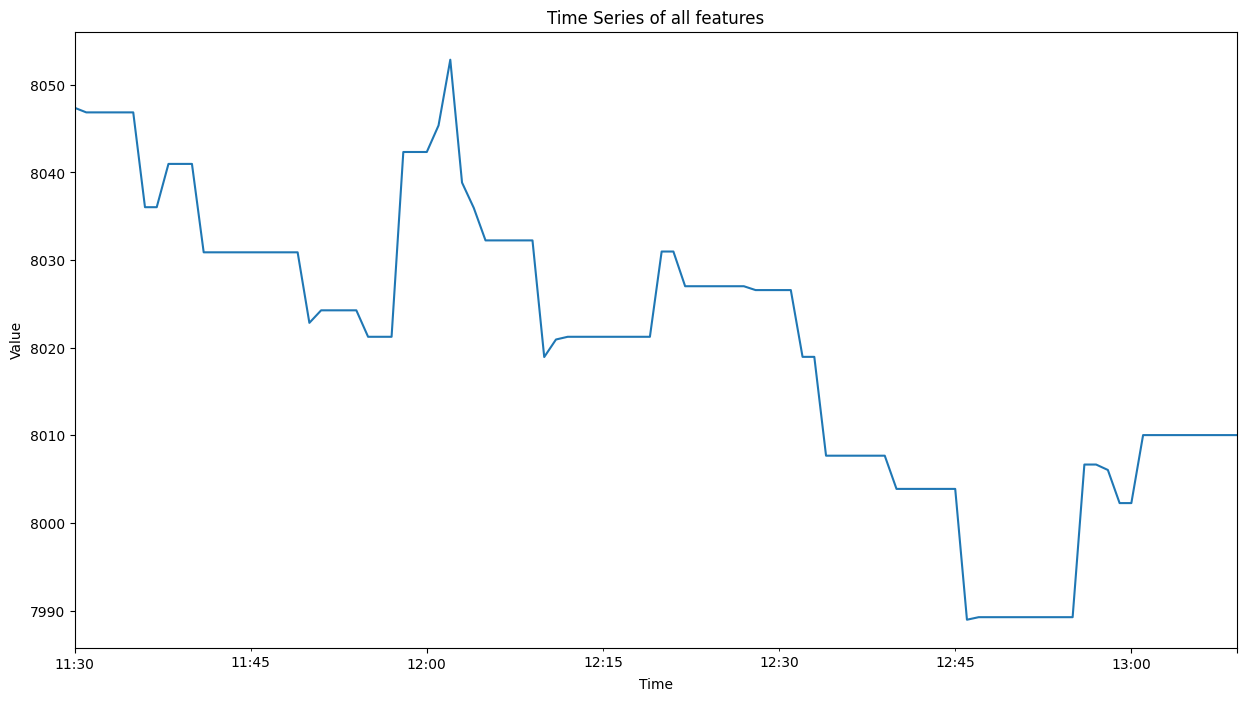

In [7]:
df = pd.read_csv("BTCUSDT4Y1MKline_cleaned_24features_nSteps10.csv")
df = df.iloc[:100]
df = df[['Open Time', 'Close']]
# Convert 'Open Time' to datetime and set as index
df['Open Time'] = pd.to_datetime(df['Open Time'], unit='s')
df.set_index('Open Time', inplace=True)

# Create a single plot for all variables
fig, ax = plt.subplots(figsize=(15, 8))

# Plot time series for 'Close' column
df['Close'].plot(ax=ax)

# Set plot title and labels
ax.set_title('Time Series of all features')
ax.set_xlabel('Time')
ax.set_ylabel('Value')

# Optionally, set y limit as discussed in the previous message
min_val = df['Close'].min()
max_val = df['Close'].max()
range_val = max_val - min_val
ax.set_ylim([min_val - 0.05 * range_val, max_val + 0.05 * range_val])

plt.show()

In [ ]:
#  Define the number of subplots based on the number of columns
n = len(df.columns)
n_cols = 2  # define the number of columns for your layout
n_rows = n // n_cols + n % n_cols  # compute the required number of rows

#  Create a figure and a grid of subplots

fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, 5*n_rows))

for i, column in enumerate(df.columns):
    current_row = i // n_cols
    current_col = i % n_cols
    print("current_row", current_row)
    print("current_col", current_col)
    
    ax[current_row, current_col].set_title(column)
    
    # Plot distribution for each column
    sns.histplot(data=df[column], kde=True, ax=ax[current_row, current_col])

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

# Create a time series plot for each variable
fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, 5*n_rows))

for i, column in enumerate(df.columns):
    current_row = i // n_cols
    current_col = i % n_cols
    ax[current_row, current_col].set_title(column)

    # Plot time series for each column
    sns.lineplot(data=df[column], ax=ax[current_row, current_col])

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


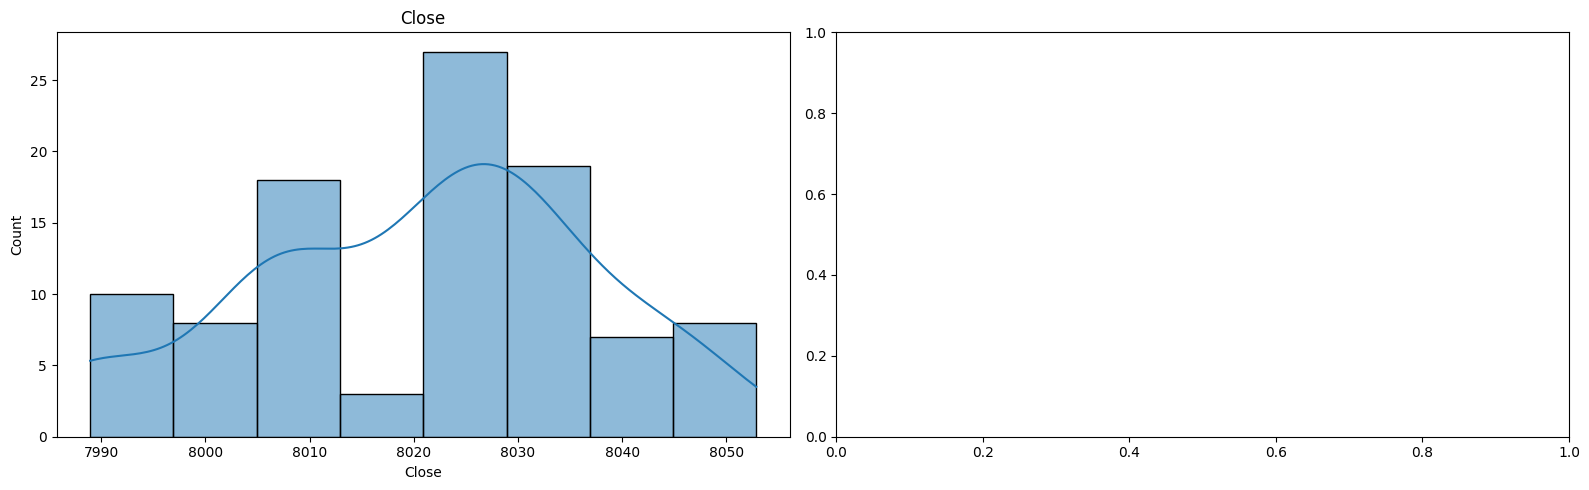

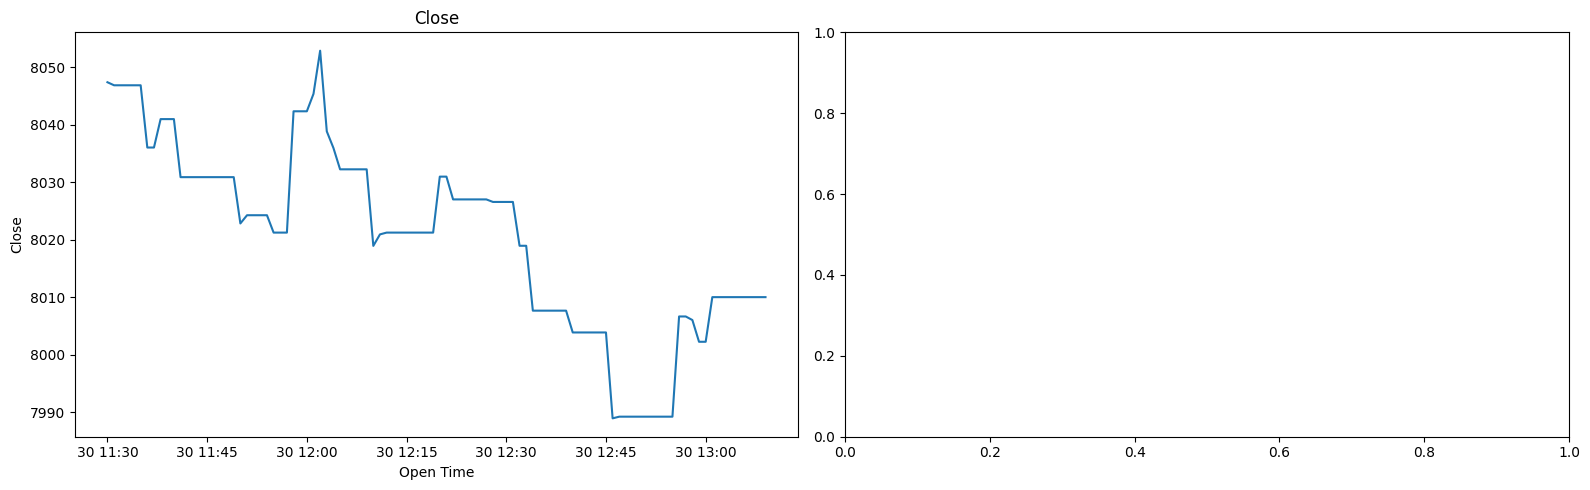

In [12]:
# Define the number of subplots based on the number of columns
n = len(df.columns)
n_cols = 2  # define the number of columns for your layout
n_rows = n // n_cols + n % n_cols  # compute the required number of rows

# Create a figure and a grid of subplots
fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, 5*n_rows))

# Force ax to always be a 2D array
ax = np.atleast_2d(ax)

for i, column in enumerate(df.columns):
    current_row = i // n_cols
    current_col = i % n_cols
    ax[current_row, current_col].set_title(column)
    
    # Plot distribution for each column
    sns.histplot(data=df[column], kde=True, ax=ax[current_row, current_col])

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

# Create a time series plot for each variable
fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, 5*n_rows))

# Force ax to always be a 2D array
ax = np.atleast_2d(ax)

for i, column in enumerate(df.columns):
    current_row = i // n_cols
    current_col = i % n_cols
    ax[current_row, current_col].set_title(column)

    # Plot time series for each column
    sns.lineplot(data=df[column], ax=ax[current_row, current_col])

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


In [4]:
df = pd.read_csv("BTCUSDT4Y1MKline_cleaned_24features_nSteps10.csv")
#  print(df.head()))

In [ ]:
print(df.shape)
print(df.columns)
print(df.head()) 

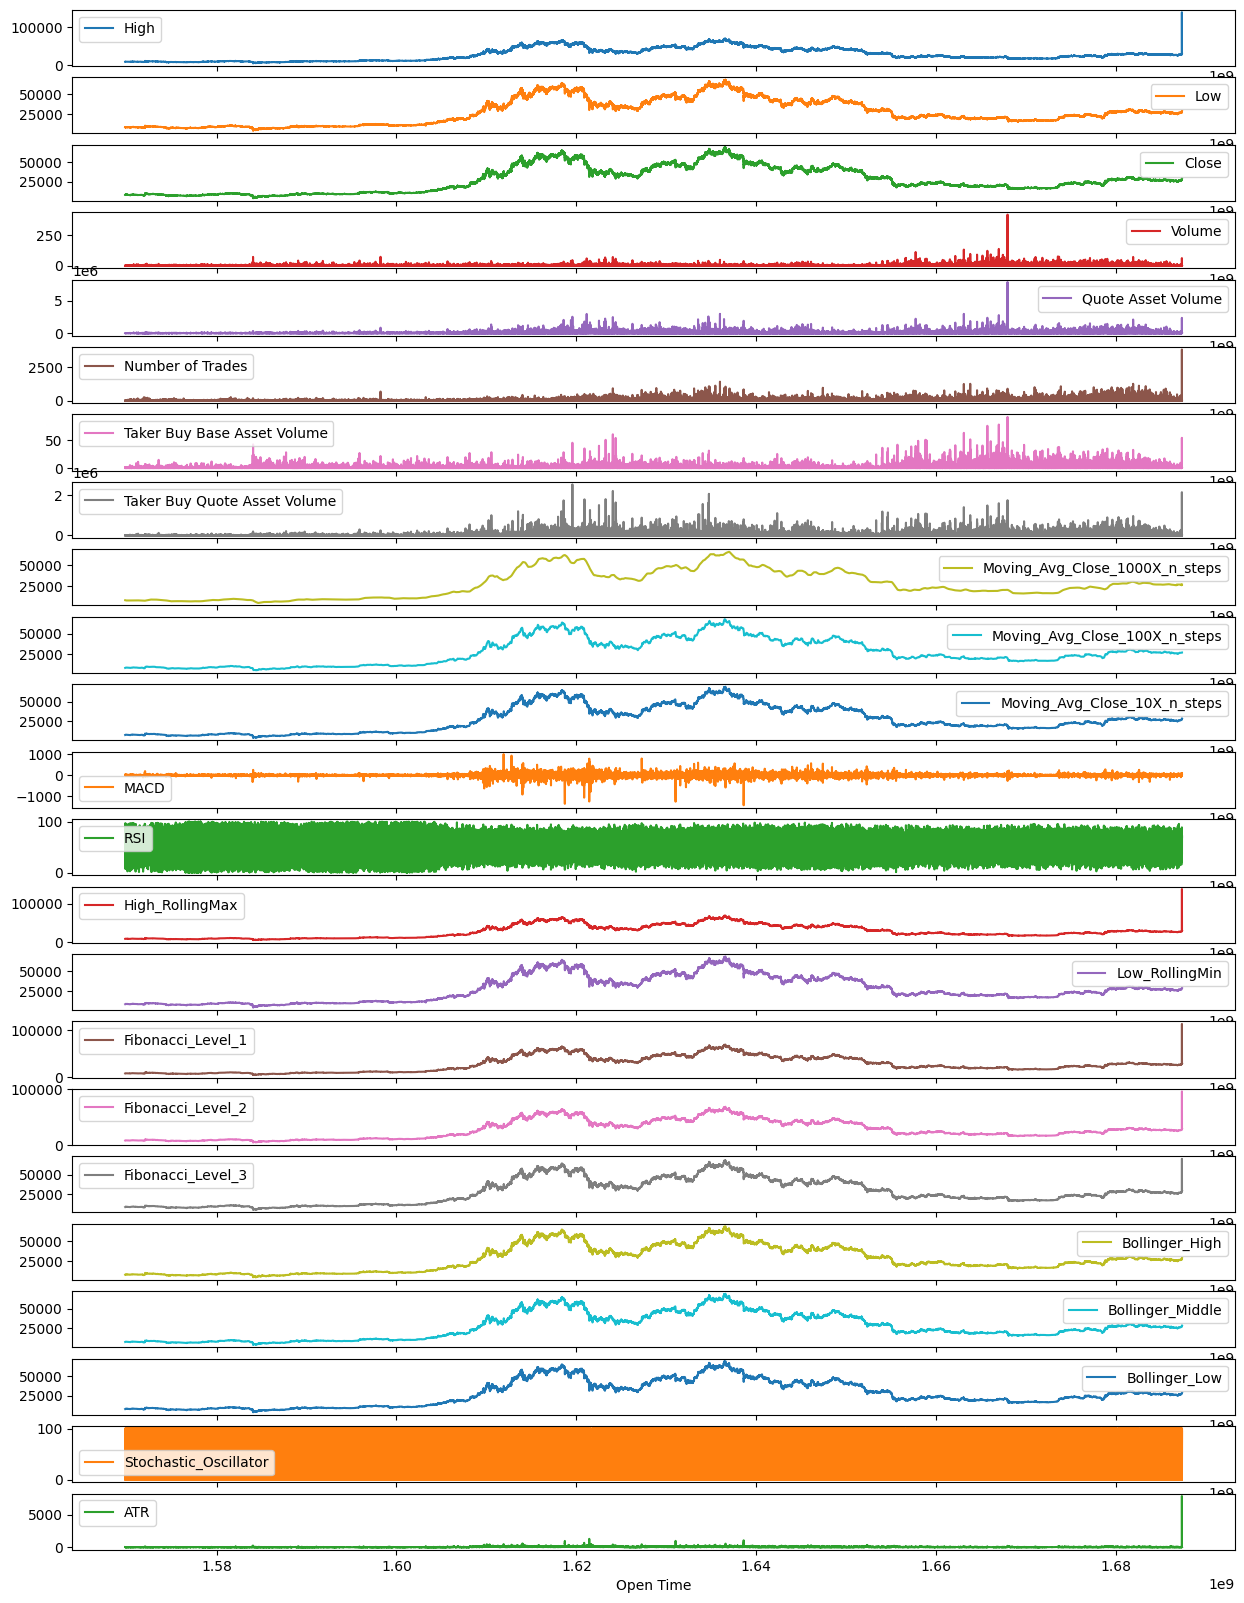

In [4]:
# plot df columns vs Open Time column
df.plot(x='Open Time', subplots=True, figsize=(15, 20))
plt.show()

In [5]:
# df = pd.read_csv("BTCUSDT4Y1MKline_cleaned_24features_nSteps10.csv")
df['Close_diff'] = df['Close'].diff()
increase_instances = sum(df['Close_diff'] > 0)
total_instances = len(df['Close_diff'])

# calculating the proportion of increases
proportion_increase = increase_instances / total_instances

print('Proportion of times Close price increased:', proportion_increase)

Proportion of times Close price increased: 0.35864977394241265


In [ ]:
# variance of the Close price

df = pd.read_csv(input_filename)
df['Open Time'] = pd.to_datetime(df['Open Time'])
df.set_index('Open Time', inplace=True)

# List of timeframes you want to analyze
timeframes = ['1T'
              # ,'5T', '15T', '1H', '1D'
                    ]

conversion = {'T': 1, 'H': 60, 'D': 1440}  # Define conversion for T, H, and D to minutes

for tf in timeframes:
    # Resample data
    resampled = df.resample(tf).agg({'Close': 'last'})

    # Calculate variance
    variance = resampled.var()
    avg_variance = variance.mean()

    # Calculate standard deviation
    std_dev = resampled.std()
    avg_std_dev = std_dev.mean()

    # Calculate absolute % change
    pct_change = resampled.pct_change()
    avg_abs_pct_change = pct_change.abs().mean()

    # Calculate mean
    mean = resampled.mean()
    # Calculate standard deviation
    std_dev = resampled.std()
    # Convert standard deviation to a percentage
    std_dev_pct = std_dev / mean * 100
    
    # print(f"Average Variance for {tf} timeframe:")
    # print(avg_variance)
    # print(f"Average Standard Deviation for {tf} timeframe:")
    # print(avg_std_dev)
    print(f"Average Absolute % Change for {tf} timeframe:")
    print(avg_abs_pct_change.iloc[0])
    # print(f"Standard Deviation for {tf} timeframe:")
    # print(std_dev)

    # Get timeframe units (e.g., 'T', 'H', 'D')
    timeframe_unit = tf[-1]
    
    # Convert timeframe to common unit (e.g., minutes)
    normalized_tf = int(tf[:-1]) * conversion[timeframe_unit]

    # Now this operation will make sense
    # print("Absolute change / time frame * 1000:")
    # print(avg_abs_pct_change.iloc[0] / normalized_tf * 1000)


    